In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
import warnings

warnings.filterwarnings("ignore")

In [83]:
pd.set_option('display.max_columns', None)

In [84]:
df = pd.read_csv('data/gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [85]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip violet,sector 69,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet a...,4,4,2,6.0,West,Relatively New,2010.0,NaN,1500.0,0,0,1,0,0,0,174
1,house,independent,sector 2,6.00,20000.0,3000.0,Built Up area: 333 (278.43 sq.m.),4,4,1,2.0,NaN,Relatively New,NaN,333.0,NaN,0,0,0,0,0,0,0
2,flat,shree kirpalu gi sector 52,sector 52,1.45,7631.0,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,3+,7.0,West,Relatively New,1900.0,1800.0,1700.0,0,0,0,0,1,2,108
3,flat,tulip violet,sector 69,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,0.0,South-West,Relatively New,2010.0,NaN,NaN,0,0,0,0,0,0,49
4,flat,mvn athens,sohna road,0.25,5198.0,481.0,Built Up area: 481 (44.69 sq.m.),2,2,0,0.0,NaN,Relatively New,NaN,481.0,NaN,0,0,0,0,0,0,37


In [86]:
df.shape

(3678, 23)

In [87]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

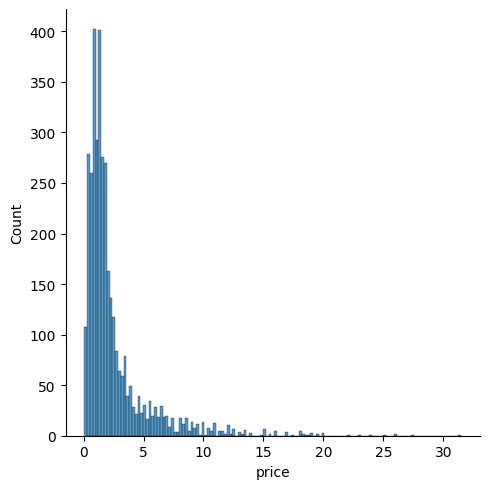

In [88]:
# outliers on the basis of price column
sns.displot(df['price'])

<Axes: xlabel='price'>

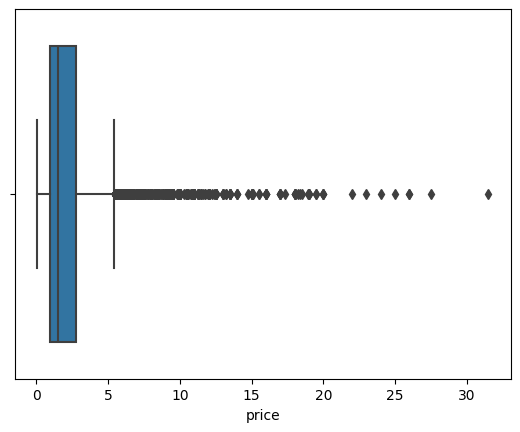

In [89]:
sns.boxplot(x=df['price'])

In [90]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [91]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
997,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,74
3531,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
1506,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
2559,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
319,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
1592,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
2781,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
3626,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
808,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
3435,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31


In [92]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

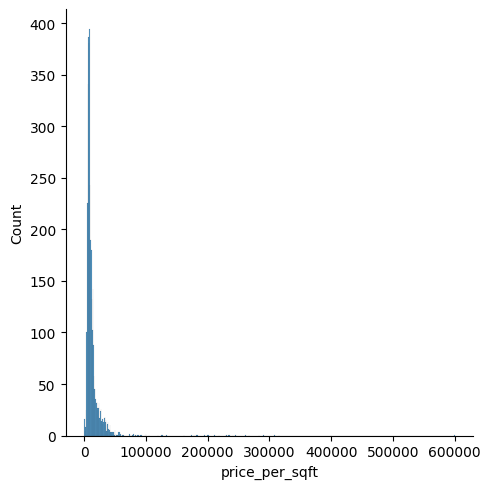

In [93]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

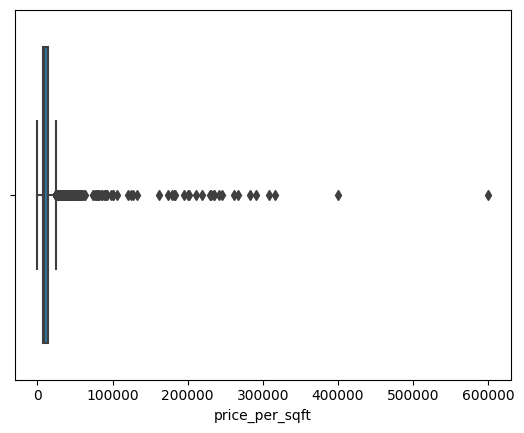

In [94]:
sns.boxplot(x=df['price_per_sqft'])

In [95]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [96]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

In [97]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

In [98]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [99]:
df.update(outliers_sqft)

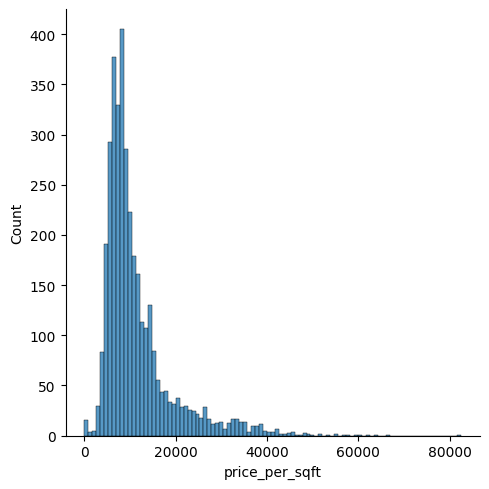

In [100]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

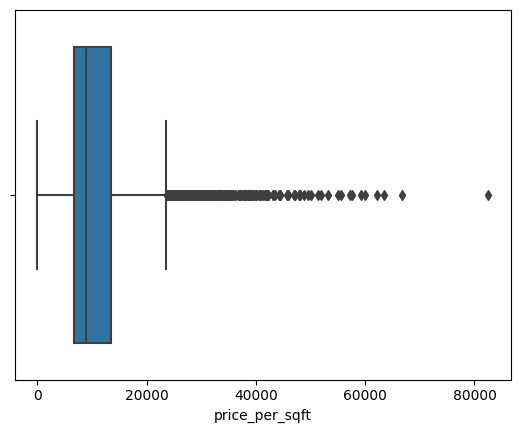

In [101]:
sns.boxplot(x=df['price_per_sqft'])

In [102]:
df[df['price_per_sqft']>50000].shape

(13, 23)

In [103]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

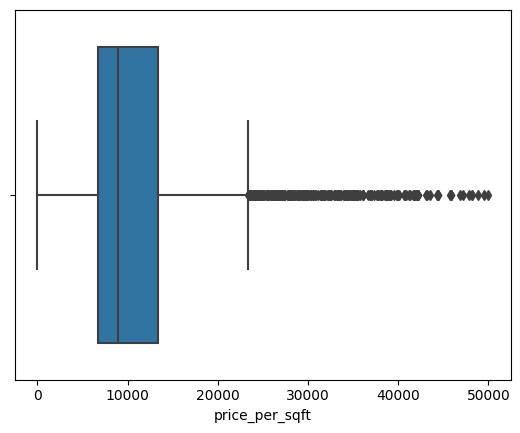

In [104]:
sns.boxplot(x=df['price_per_sqft'])

### Area

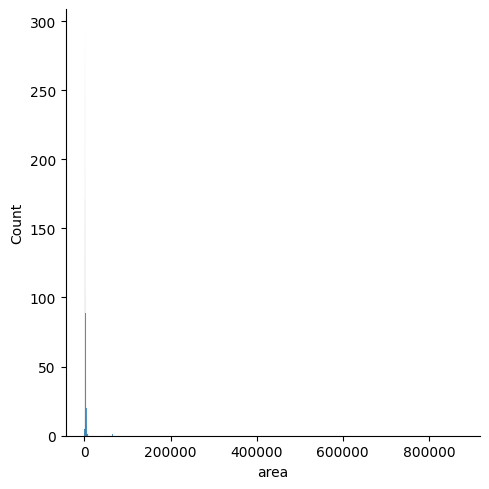

In [105]:
sns.displot(df['area'])

<Axes: xlabel='area'>

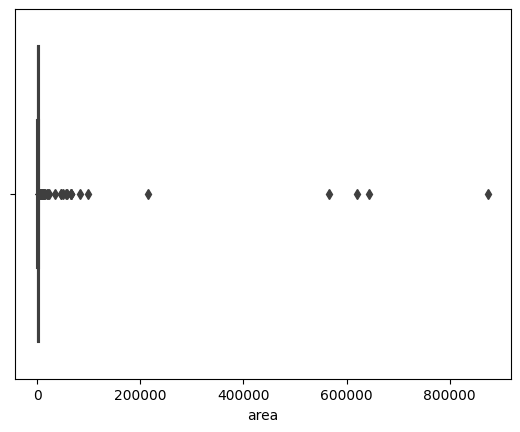

In [106]:
sns.boxplot(x=df['area'])

In [107]:
df['area'].describe()

count      3648.000000
mean       2948.028783
std       23205.019385
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [108]:
df[df['area'] > 100000].shape

(5, 23)

In [109]:
df = df[df['area'] < 100000]

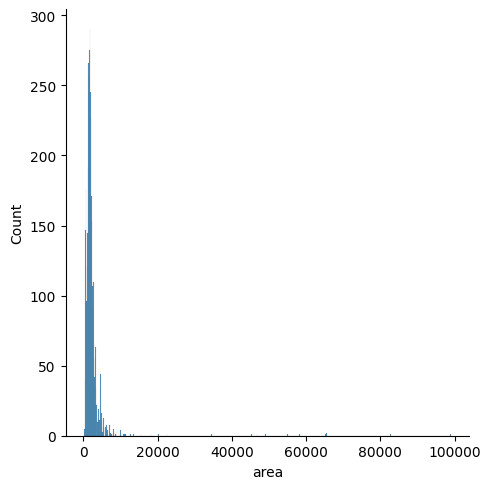

In [110]:
sns.displot(df['area'])

<Axes: xlabel='area'>

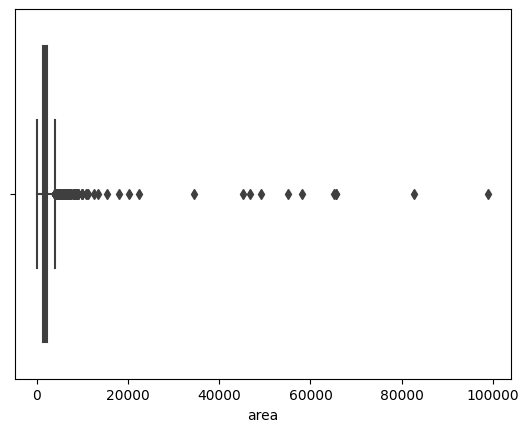

In [111]:
sns.boxplot(x=df['area'])

In [112]:
df[df['area'] > 10000].sort_values('area',ascending=False).shape

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

(20, 23)

In [113]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [114]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
354,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
345,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3010,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2187,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2479,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2107,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2006,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
3402,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
350,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
1871,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [115]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

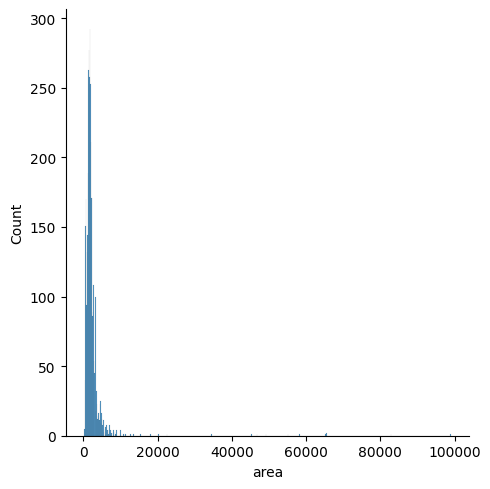

In [116]:
sns.displot(df['area'])

<Axes: xlabel='area'>

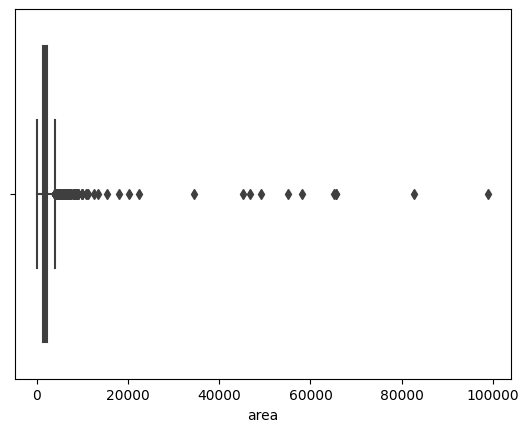

In [117]:
sns.boxplot(x=df['area'])

In [118]:
df['area'].describe()

count     3635.000000
mean      2153.839890
std       3628.197751
min        145.000000
25%       1262.000000
50%       1750.000000
75%       2347.000000
max      98978.000000
Name: area, dtype: float64

### Bedroom

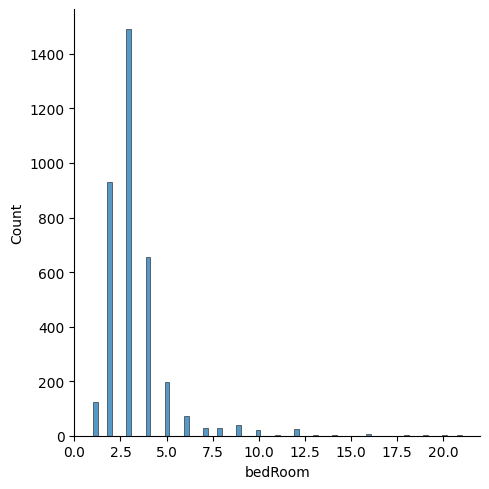

In [119]:
sns.displot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

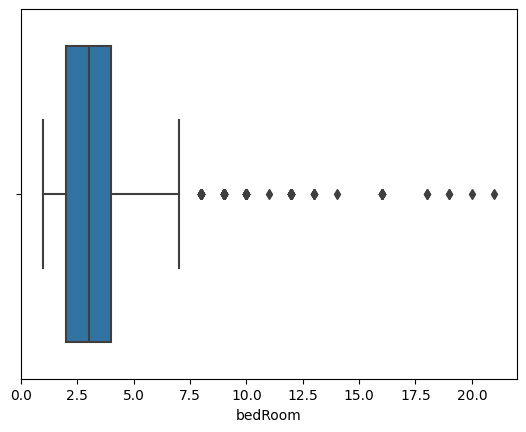

In [120]:
sns.boxplot(x=df['bedRoom'])

In [121]:
df['bedRoom'].describe()

count    3634.000000
mean        3.332416
std         1.831044
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [122]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1941,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,49.0
103,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,22.0
1227,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0
2938,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0
1855,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,70.0
3643,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,57.0
1021,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,20.0
3435,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,31.0
3199,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
1365,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,41.0


In [123]:
df = df[df['bedRoom'] <= 10]

In [124]:
df.shape

(3589, 23)

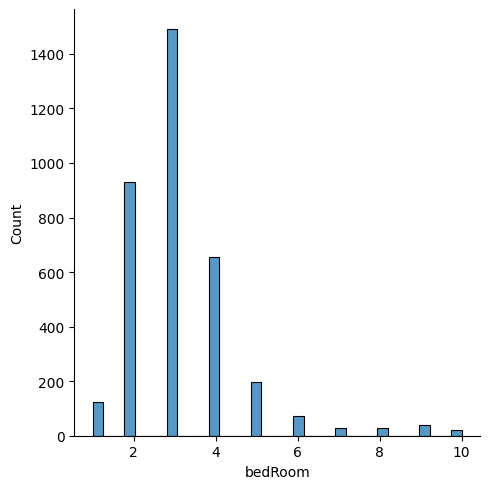

In [125]:
sns.displot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

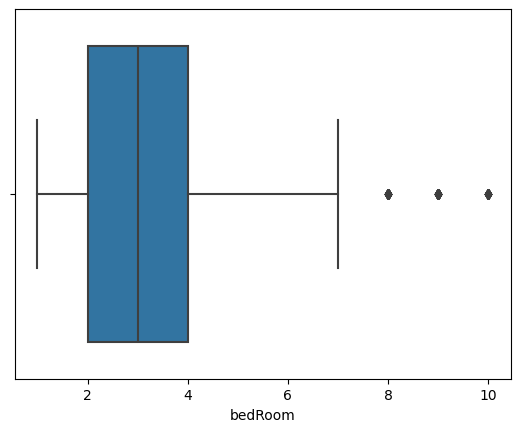

In [126]:
sns.boxplot(x=df['bedRoom'])

In [127]:
df['bedRoom'].describe()

count    3589.000000
mean        3.202563
std         1.395339
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

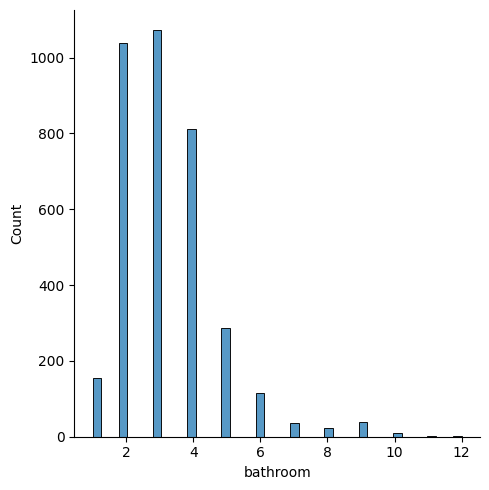

In [128]:
sns.displot(df['bathroom'])

<Axes: xlabel='bathroom'>

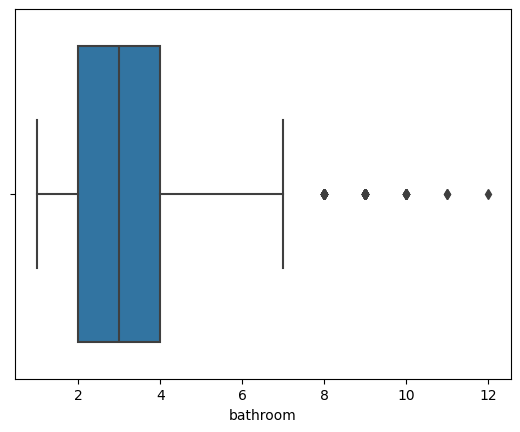

In [129]:
sns.boxplot(x=df['bathroom'])

In [130]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3160,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,146.0
1563,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,39.0
1856,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0


In [131]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip violet,sector 69,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet a...,4.0,4.0,2,6.0,West,Relatively New,2010.0,NaN,1500.0,0.0,0.0,1.0,0.0,0.0,0.0,174.0
1,house,independent,sector 2,6.00,20000.0,3000.0,Built Up area: 333 (278.43 sq.m.),4.0,4.0,1,2.0,NaN,Relatively New,NaN,333.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,tulip violet,sector 69,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.),4.0,4.0,2,0.0,South-West,Relatively New,2010.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,mvn athens,sohna road,0.25,5198.0,481.0,Built Up area: 481 (44.69 sq.m.),2.0,2.0,0,0.0,NaN,Relatively New,NaN,481.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,37.0
5,flat,tulip violet,sector 69,1.60,10139.0,1578.0,Super Built up area 1578(146.6 sq.m.),3.0,3.0,2,0.0,North-West,Relatively New,1578.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,166.0


### super built up area

<Axes: xlabel='super_built_up_area', ylabel='Density'>

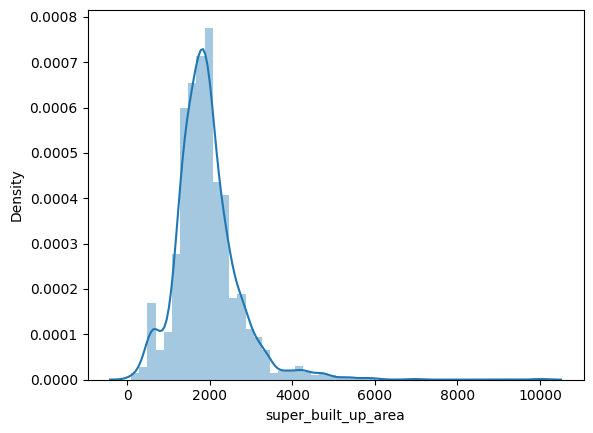

In [132]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

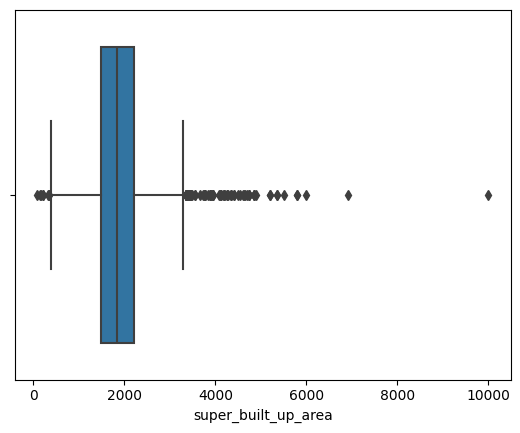

In [133]:
sns.boxplot(x=df['super_built_up_area'])

In [134]:
df['super_built_up_area'].describe()

count     1871.000000
mean      1925.452459
std        764.841850
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [135]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1789,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,140.0
2609,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0


### built up area

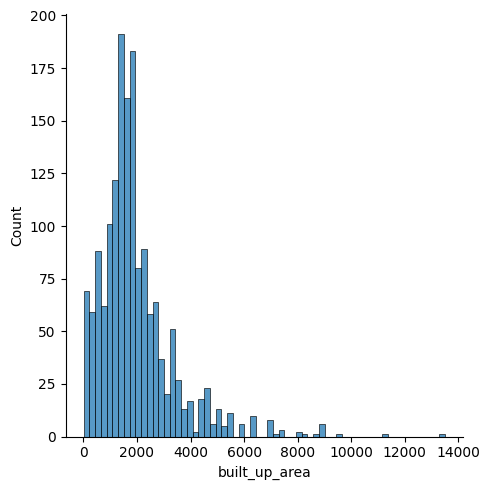

In [136]:
sns.displot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

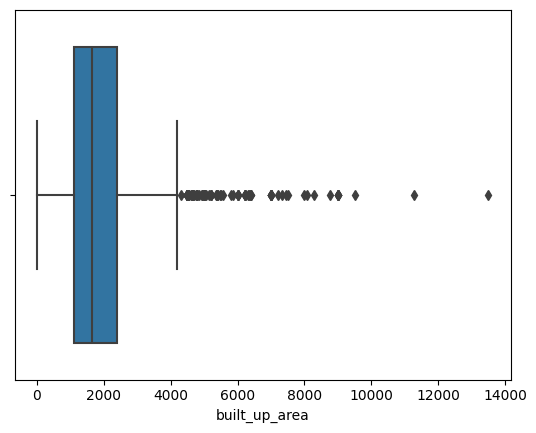

In [137]:
sns.boxplot(x=df['built_up_area'])

In [138]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3531,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0
3565,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### carpet area

<Axes: xlabel='carpet_area', ylabel='Density'>

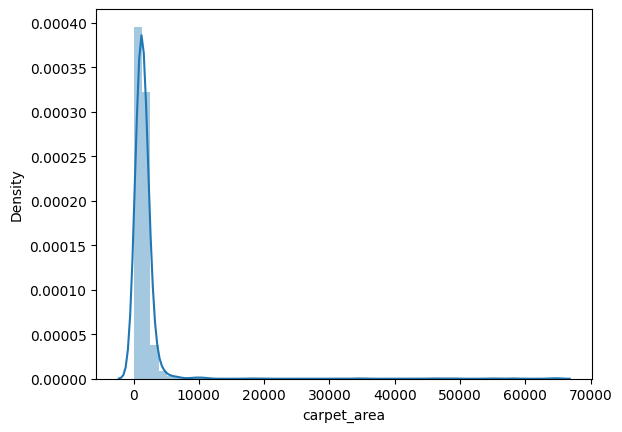

In [139]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

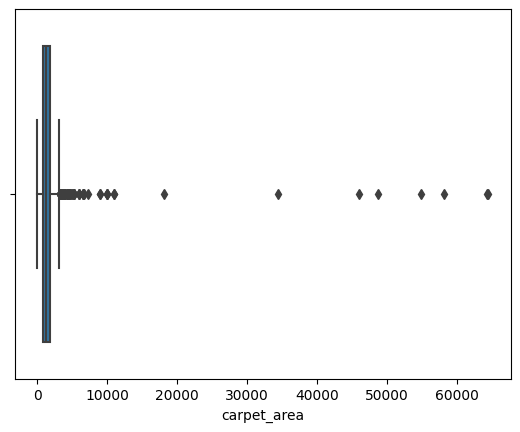

In [140]:
sns.boxplot(x=df['carpet_area'])

In [141]:
df[df['carpet_area'] > 10000].shape

(10, 23)

In [142]:
df.loc[2131,'carpet_area'] = 1812

In [143]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
354,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,2.0,60.0
364,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
1593,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0
1871,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0
2006,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2107,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2187,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0
3010,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
3144,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0
3402,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0


In [144]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip violet,sector 69,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet a...,4.0,4.0,2,6.0,West,Relatively New,2010.0,NaN,1500.0,0.0,0.0,1.0,0.0,0.0,0.0,174.0
1,house,independent,sector 2,6.00,20000.0,3000.0,Built Up area: 333 (278.43 sq.m.),4.0,4.0,1,2.0,NaN,Relatively New,NaN,333.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,tulip violet,sector 69,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.),4.0,4.0,2,0.0,South-West,Relatively New,2010.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,mvn athens,sohna road,0.25,5198.0,481.0,Built Up area: 481 (44.69 sq.m.),2.0,2.0,0,0.0,NaN,Relatively New,NaN,481.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,37.0
5,flat,tulip violet,sector 69,1.60,10139.0,1578.0,Super Built up area 1578(146.6 sq.m.),3.0,3.0,2,0.0,North-West,Relatively New,1578.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,166.0


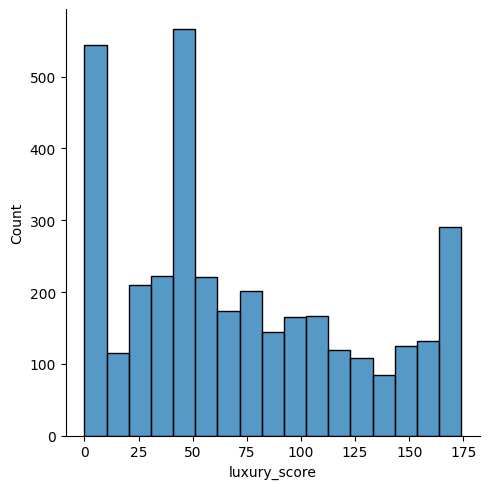

In [145]:
sns.displot(df['luxury_score'])

<Axes: >

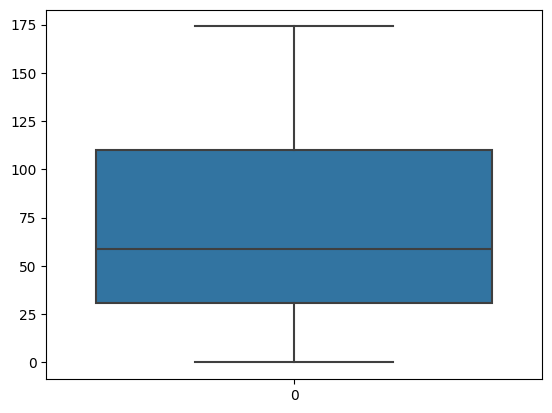

In [146]:
sns.boxplot(df['luxury_score'])

In [147]:
df.shape

(3589, 23)

In [148]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [149]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip violet,sector 69,1.90,9453.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet a...,4.0,4.0,2,6.0,West,Relatively New,2010.0,NaN,1500.0,0.0,0.0,1.0,0.0,0.0,0.0,174.0
1,house,independent,sector 2,6.00,20000.0,3000.0,Built Up area: 333 (278.43 sq.m.),4.0,4.0,1,2.0,NaN,Relatively New,NaN,333.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,tulip violet,sector 69,1.90,9453.0,2010.0,Super Built up area 2010(186.74 sq.m.),4.0,4.0,2,0.0,South-West,Relatively New,2010.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,mvn athens,sohna road,0.25,5198.0,481.0,Built Up area: 481 (44.69 sq.m.),2.0,2.0,0,0.0,NaN,Relatively New,NaN,481.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,37.0
5,flat,tulip violet,sector 69,1.60,10139.0,1578.0,Super Built up area 1578(146.6 sq.m.),3.0,3.0,2,0.0,North-West,Relatively New,1578.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,166.0


<Axes: xlabel='price_per_sqft', ylabel='Density'>

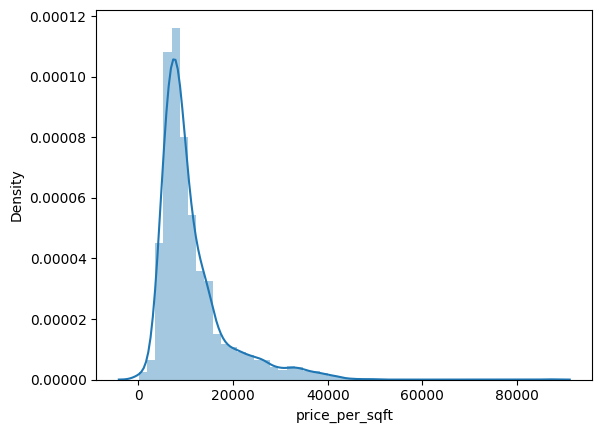

In [150]:
sns.distplot(df['price_per_sqft'])

<Axes: >

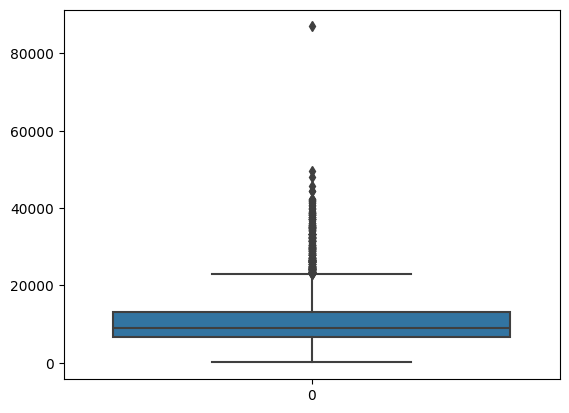

In [151]:
sns.boxplot(df['price_per_sqft'])

In [152]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,independent,sector 26,9.0,86957.0,1035.0,Plot area 300(250.84 sq.m.),5.0,5.0,2,3.0,South-West,Old Property,NaN,2700.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,110.0
770,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
808,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,97.0
1045,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,7.0
1110,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,2.0,60.0
2048,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,121.0
2117,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,2.0,88.0
3445,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
3781,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,103.0


In [153]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

189.216

In [154]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
35,house,independent,sector 28,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5.0,3.0,0,1.0,NaN,Undefined,NaN,50.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,house,jacobpura,sector 12,0.53,14601.0,363.0,Plot area 360(33.45 sq.m.),4.0,4.0,2,3.0,East,Relatively New,NaN,360.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9.0,9.0,3+,3.0,West,New Property,NaN,1557.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,116.0
152,house,independent,sector 4,0.50,10482.0,477.0,Built Up area: 53 (44.31 sq.m.),5.0,3.0,0,1.0,NaN,Undefined,NaN,53.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,house,my home,new sector 2,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,3.0,West,Moderately Old,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,house,independent,sector 4,0.60,11696.0,513.0,Plot area 57(5.3 sq.m.),3.0,3.0,1,2.0,NaN,Old Property,NaN,57.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3445,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
3550,house,independent,sector 9,0.42,9333.0,450.0,Built Up area: 450 (41.81 sq.m.),5.0,3.0,2,2.0,NaN,Undefined,NaN,450.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3646,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
